# Machine Learning Model Selection

Here we will use GridSearch Cross Validation to help us determine the best hyperparameters to use for our model as well as Pipeline to make our modelling tasks easier.

In [24]:
import pandas as pd
from datetime import datetime
import time
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [2]:
main_df = pd.read_csv(r'C:\Users\john.osorio\Desktop\BLACK CAT\Capstone Project\House Price Predictor\melbourne-housing-market\melbourne_housing_transformed.csv')

In [3]:
main_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
main_df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Method1,CouncilArea5,CouncilArea4,CouncilArea3,CouncilArea2,CouncilArea1,Regionname3,Regionname2,Regionname1,DateTime
0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,145.899025,1966.474928,...,0.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.480684e+09
1,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,...,0.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.454504e+09
2,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,...,-1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.488546e+09
3,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,145.899025,1966.474928,...,-1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.488546e+09
4,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,...,1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.464962e+09


In [5]:
main_df.DateTime[0]

1480683600.0

In [6]:
scoring = make_scorer(r2_score)

In [7]:
X = main_df.drop('Price', axis=1)
y = main_df.Price

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
pipe_ridge = Pipeline([('Scaler', StandardScaler()), ('clf', Ridge())])

pipe_decision_tree_regressor = Pipeline(steps=[('Scaler', StandardScaler()), ('clf', DecisionTreeRegressor(random_state=42))])

pipe_random_forest = Pipeline([('Scaler', StandardScaler()), ('clf', RandomForestRegressor(random_state=42))])

In [10]:
grid_params_ridge = [{'clf__alpha': range(1, 5)}]

grid_params_decision_tree = [{'clf__min_samples_split': range(2, 10), 'clf__max_depth': range(2, 10)}] 

grid_params_random_forest = [{'clf__min_samples_split': range(2, 10), 'clf__max_depth': range(2, 10)}]

In [11]:
gs_ridge = GridSearchCV(estimator = Ridge(random_state=42), param_grid={'alpha': range(1, 5)}, scoring=scoring, cv=5)

gs_decision_tree = GridSearchCV(pipe_decision_tree_regressor, param_grid={'clf__min_samples_split': range(2, 10), 'clf__max_depth': range(2, 10)},scoring=scoring, cv=5, refit=True)

gs_random_forest = GridSearchCV(pipe_random_forest, param_grid={'clf__min_samples_split': range(2, 10), 'clf__max_depth': range(2, 10)}, scoring=scoring, cv=5, refit=True)

Fit the model into the Pipelines

In [14]:
regressors = [pipe_ridge, pipe_decision_tree_regressor, pipe_random_forest]
gs_list = [gs_ridge, gs_decision_tree, gs_random_forest]
reg_dict = {0:'Ridge', 1:'Decision Tree', 2:'Random Forest'}

predict_list = []

for index, cs in enumerate(regressors):
    print('Now running: ', reg_dict[index], 'Regressor')
    cs.fit(X_train, y_train)
    
    print(reg_dict[index], "model score: %.3f" % cs.score(X_test, y_test))
    
    temp_gs = gs_list[index]
    temp_gs.fit(X_train, y_train)
    
    print(reg_dict[index], 'Best Parameters are ', temp_gs.best_params_)
    print('R2 Score is:', r2_score(y_test, temp_gs.best_estimator_.predict(X_test)))
    predict_list[index] = temp_gs.best_estimator_.predict(X_test)
    print('\n')
    

Now running:  Ridge Regressor
Ridge model score: 0.606
Ridge Best Parameters are  {'alpha': 4}
R2 Score is: 0.6057010600285168


Now running:  Decision Tree Regressor
Decision Tree model score: 0.610
Decision Tree Best Parameters are  {'clf__max_depth': 9, 'clf__min_samples_split': 9}
R2 Score is: 0.7127130397039341


Now running:  Random Forest Regressor
Random Forest model score: 0.770
Random Forest Best Parameters are  {'clf__max_depth': 9, 'clf__min_samples_split': 7}
R2 Score is: 0.7523698853209742




# TODO: Residual Plot 

In [21]:
ridge_predict = predict_list[0]

decision_tree_predict = predict_list[1]

random_forest_predict = predict_list[2]

[Text(0,0.5,'Actual'), Text(0.5,0,'Predicted'), Text(0.5,1,'Random Forest')]

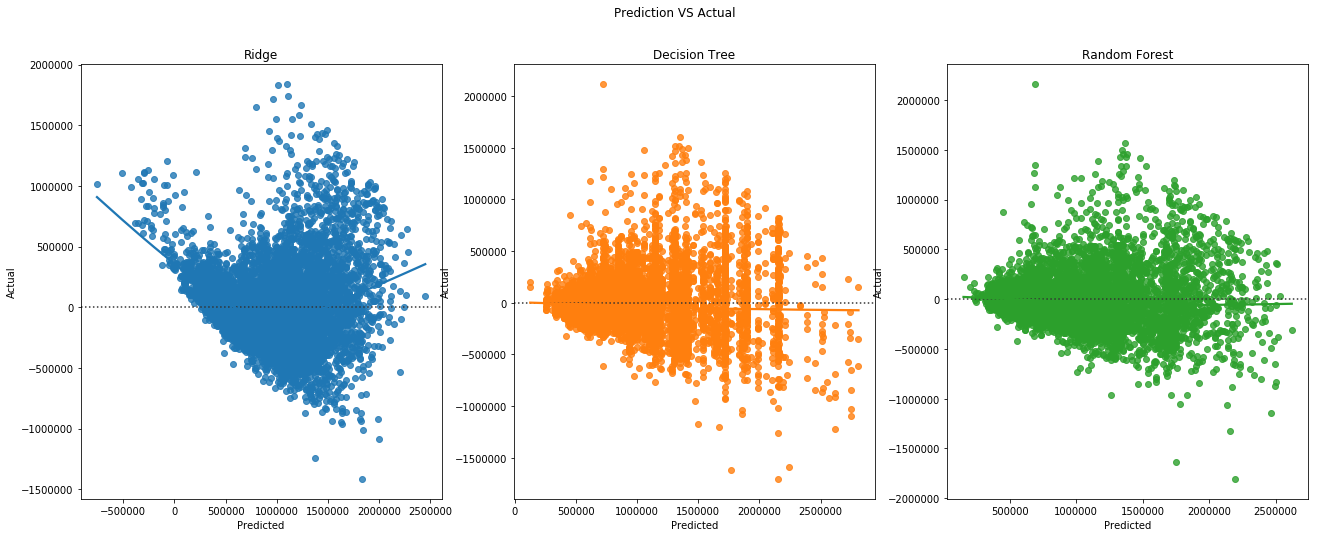

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Prediction VS Actual')

sns.residplot(ridge_predict, y_test, lowess=True, ax=axes[0])
sns.residplot(decision_tree_predict, y_test, lowess=True, ax=axes[1])
sns.residplot(random_forest_predict, y_test, lowess=True, ax=axes[2])

axes[0].set(xlabel = 'Predicted', ylabel = 'Actual', title='Ridge')
axes[1].set(xlabel = 'Predicted', ylabel = 'Actual', title='Decision Tree')
axes[2].set(xlabel = 'Predicted', ylabel = 'Actual', title='Random Forest')
